## CDIPS lightcurves of TOIs in a cluster

In [17]:
import pandas as pd

d = pd.read_csv('../data/tois_in_cluster.csv', index_col=0)
d = d.dropna().sort_values(by='distance')
d

,cluster,distance
450,COL,0.000004
837,IC_2602,0.000012
581,Trumpler_10,0.000021
893,NGC_2306,0.000027
681,NGC_2516,0.000047
839,Loden_306,0.000063
861,NGC_2516,0.000064
580,Vel_OB2,0.000076


In [18]:
from astroquery.mast.tesscut import Tesscut
from chronos import Target

print('TOI\tsectors\tcamera\tccd')
for toi in d.index.tolist():
    t = Target(toiid=toi, verbose=False)
    t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    df = Tesscut.get_sectors(t.target_coord).to_pandas()
    idx = df.sector.isin([6,7])
    if idx.any():
        print(toi, df.loc[idx,['sector','camera','ccd']].values)

TOI	sectors	camera	ccd
450 [[6 3 2]]
893 [[6 2 3]
 [7 2 4]]
681 [[7 4 1]]
861 [[7 4 1]]
580 [[7 3 1]]


In [19]:
tois_in_sector6 = [450, 893]
tois_in_sector7 = [893, 681, 861, 580]

## TOIs in Bouma19 cluster catalog (sector 6)

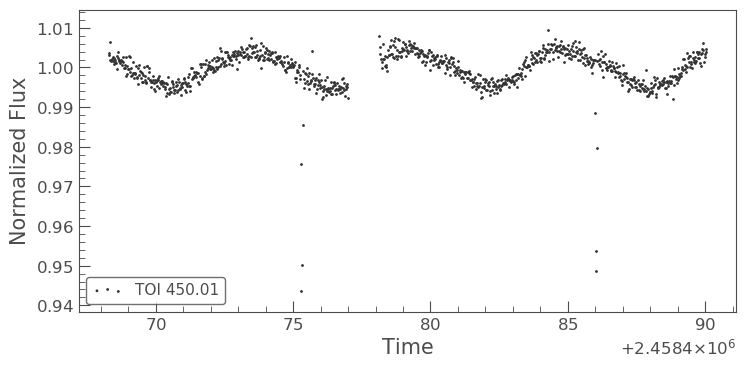

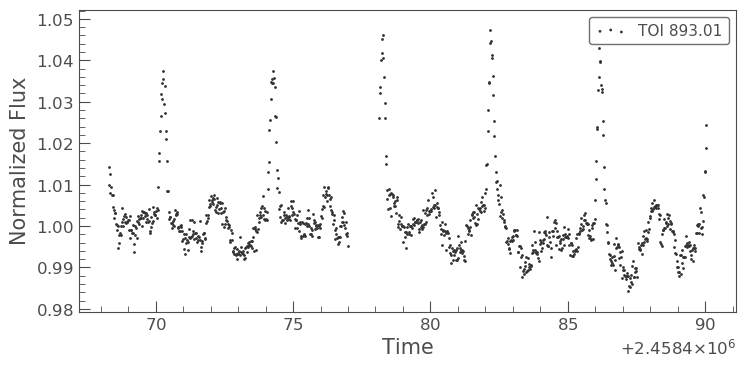

In [22]:
from chronos import Target, CDIPS

cdips_lcs = {}
for toi in tois_in_sector6:
    t = Target(toiid=toi, verbose=False)
    t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    #initialize cdips
    cdips = CDIPS(gaiaDR2id=t.gaiaid, sector=6, aper_idx=3, verbose=False)
    #get lc
    lc = cdips.lc
    #add label
    lc.label = f'TOI {toi}.01'
    lc.scatter()
    cdips_lcs[f'{toi}s{cdips.sector}'] = lc

## TOIs in Bouma19 cluster catalog (sector 7)

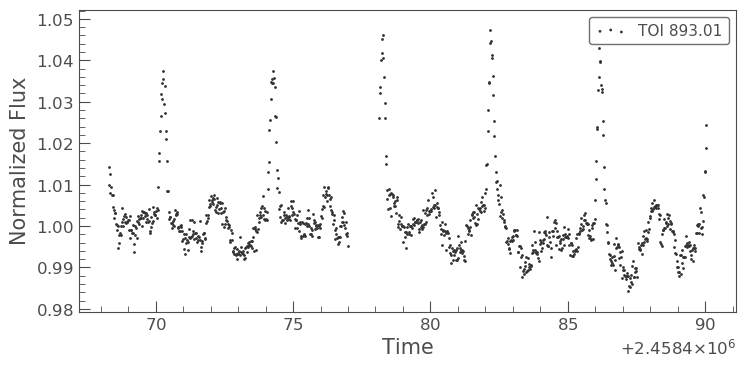

In [24]:
from chronos import CDIPS
from chronos import Target

for toi in tois_in_sector7:
    t = Target(toiid=toi, verbose=False)
    t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
    try:
        #use try except because some cdips lightcurves are missing
        cdips = CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=3, verbose=False)
        lc = cdips.lc
        lc.label = f'TOI {toi}.01'
        lc.scatter()
    except:
        pass
    cdips_lcs[f'{toi}s{cdips.sector}'] = lc

why 861, 580 does not have CDIPs lc? 

In [12]:
from chronos.utils import get_toi

d = get_toi(toi=450.01, verbose=True)

TOIs with TFPWG disposition==FP are removed.

Saved: /home/jp/github/research/project/chronos/chronos/../data/TOIs.csv

Data from TOI Release:

                                   450.01
Period (days)                     10.7148
Epoch (BJD)                   2.45844e+06
Duration (hours)                    2.054
Depth (ppm)                         56910
Comments          Star likely to be small



In [11]:
cdips_lcs.keys()

dict_keys(['450s6', '893s6', '681s7', '861s7', '580s7'])

(-0.05, 0.05)

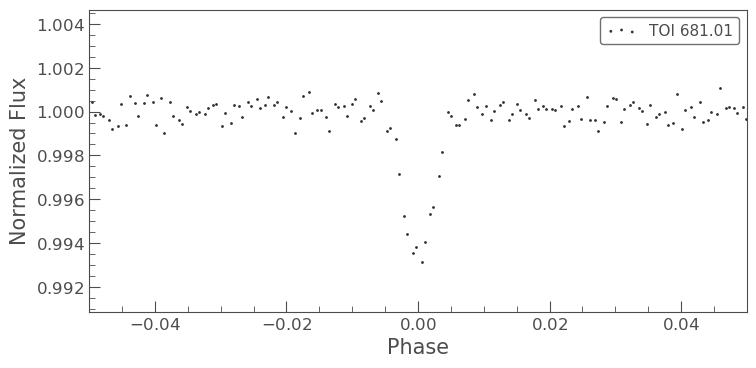

In [40]:
toi = 681
d = get_toi(toi=f'{toi}.01', verbose=False)
per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
ax = cdips_lcs[f'{toi}s7'].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
ax.set_xlim([-0.05,0.05])

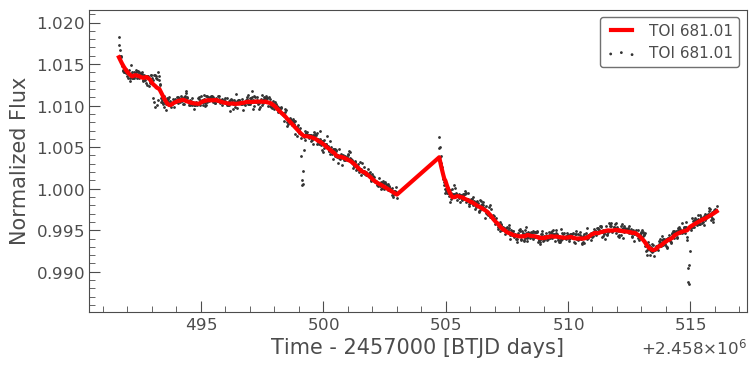

In [38]:
flat, trend = cdips_lcs[f'{toi}s7'].remove_outliers().flatten(window_length=51, return_trend=True)
ax = cdips_lcs[f'{toi}s7'].remove_outliers().scatter()
trend.plot(c='r', lw=3, ax=ax)

## Apply to all lc

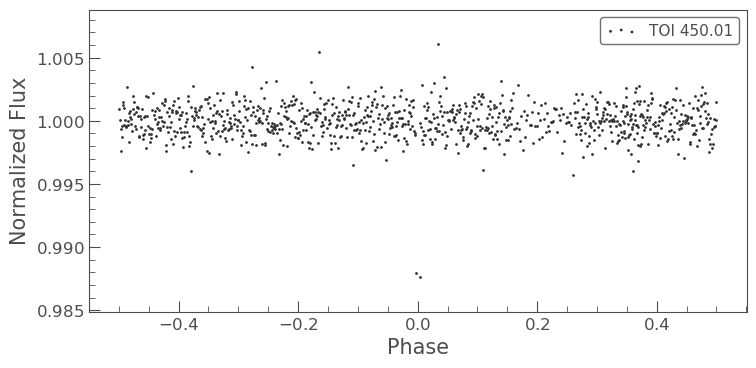

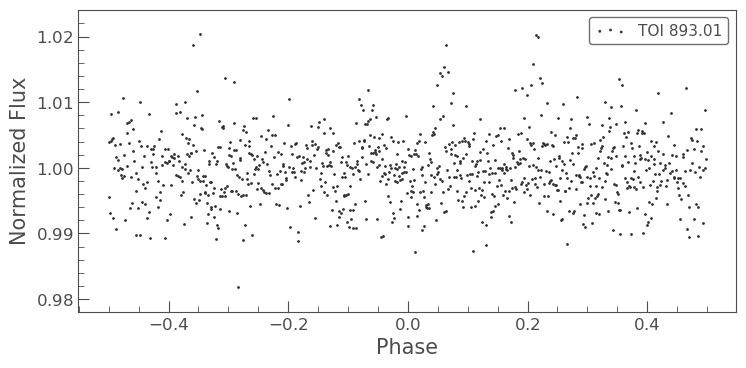

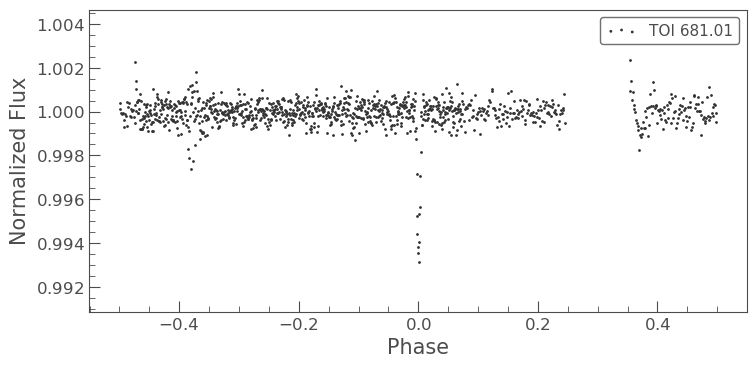

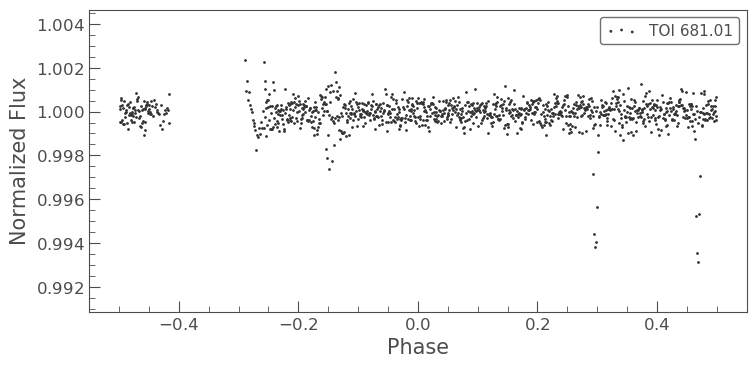

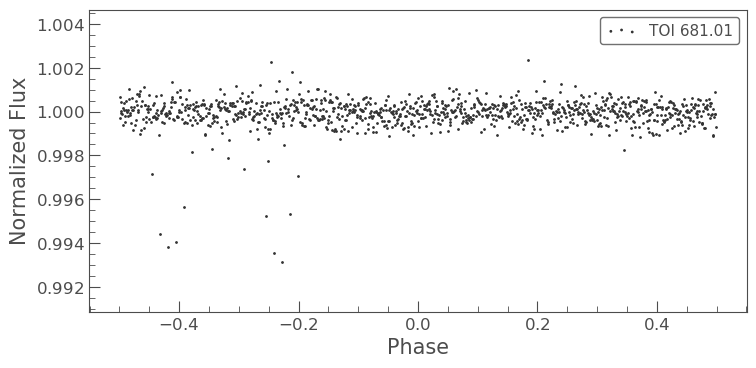

In [35]:
for key in list(cdips_lcs.keys()):
    toi = int(key[:3])
    d = get_toi(toi=f'{toi}.01', verbose=False)
    per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
    cdips_lcs[key].remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()

## Summary

(-0.05, 0.05)

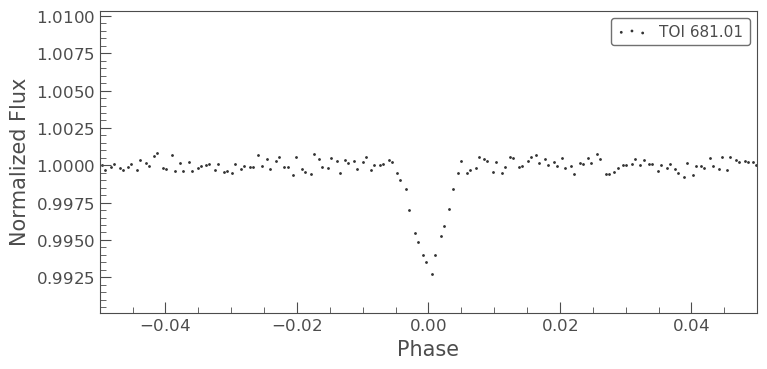

In [4]:
%matplotlib inline
from chronos import Target, CDIPS
from chronos.utils import get_toi

toi = 681
t = Target(toiid=toi, verbose=False)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
#initialize cdips
cdips = CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=1, verbose=False)
#get lc and turn into lk.TessLightCurve
lc = cdips.lc
#add label
lc.label = f'TOI {toi}.01'
#get ephemeris from TOI release (https://tev.mit.edu/data/)
d = get_toi(toi=f'{toi}.01', verbose=False)
per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
#plot
ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter()
ax.set_xlim([-0.05,0.05])

## Varying CDIPS aperture size

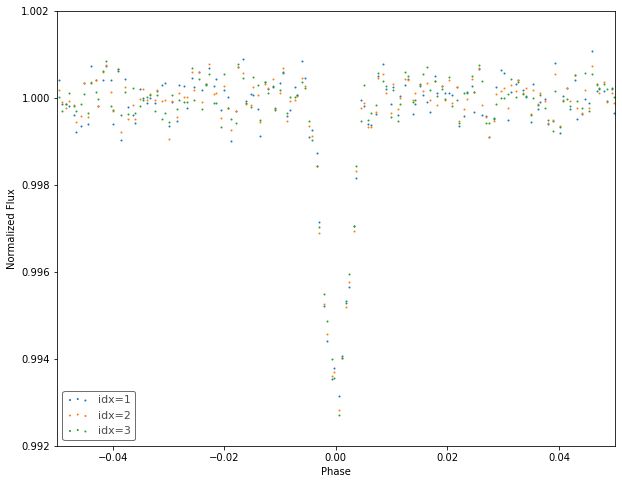

In [9]:
%matplotlib inline
from chronos import Target, CDIPS
from chronos.utils import get_toi
import matplotlib.pyplot as pl

toi = 681
t = Target(toiid=toi, verbose=False)
t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

fig, ax = pl.subplots(figsize=(10,8))

for idx in [1,2,3]:
    cdips = CDIPS(gaiaDR2id=t.gaiaid, sector=7, aper_idx=idx, verbose=False)
    #get lc and turn into lk.TessLightCurve
    lc = cdips.lc
    #add label
    lc.label = f'TOI {toi}.01'
    #get ephemeris from TOI release (https://tev.mit.edu/data/)
    d = get_toi(toi=f'{toi}.01', verbose=False)
    per, t0 = d[['Period (days)', 'Epoch (BJD)']].values[0]
    #plot
    ax = lc.remove_outliers().flatten(window_length=51).fold(period=per, t0=t0).scatter(ax=ax, label=f'idx={idx}')
    ax.set_xlim([-0.05,0.05])
    ax.set_ylim([0.992,1.002])